We will use the digits dataset from SKLearn to classify using different models such as Logistic Regression, SVM and Random Forest classifier and we will evaluate their performance using K fold cross validation

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
data = load_digits()

## Creating DataFrame

In [61]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## X/y split and Train Test splitting

In [62]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Manually training anc checking score of each models

In [63]:
logis = LogisticRegression().fit(X_train, y_train)
logis.score(X_test, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

In [64]:
svm = SVC().fit(X_train, y_train)
svm.score(X_test, y_test)

0.9861111111111112

In [65]:
ranfo = RandomForestClassifier().fit(X_train, y_train)
ranfo.score(X_test, y_test)

0.9666666666666667

## Creating a function to easily train and check score of a model

In [66]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [67]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

In [68]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9861111111111112

In [69]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.9694444444444444

## Checking KFold on dummy data of 10 to 100

In [70]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
for train, test in kfold.split([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]):
    print(train, test)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


## Manual code to get and store each model scores using Stratified KFold (Without Cross Validation)

In [75]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
logis_scores = []
svm_scores = []
ranfo_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], \
                                    y.loc[train_index], y.loc[test_index]
    
    logis_scores.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    svm_scores.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    ranfo_scores.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [76]:
print(logis_scores)
print(svm_scores)
print(ranfo_scores)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9365609348914858, 0.9582637729549248, 0.9248747913188647]


# CROSS VALIDATION

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), X, y, cv=folds)

array([0.96494157, 0.97996661, 0.96494157])

In [80]:
cross_val_score(RandomForestClassifier(), X, y, cv=folds)

array([0.93656093, 0.95158598, 0.92654424])

In [90]:
cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=folds)

array([0.92487479, 0.93823038, 0.92320534])

## USING SVM SINCE IT PERFORMED THE BEST THEN DOING PREDICTION 

In [91]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9549248747913188

In [92]:
y_predict = model.predict(X_test)

In [93]:
np.sum(y_test != y_predict)

27

Text(95.72222222222221, 0.5, 'Truth')

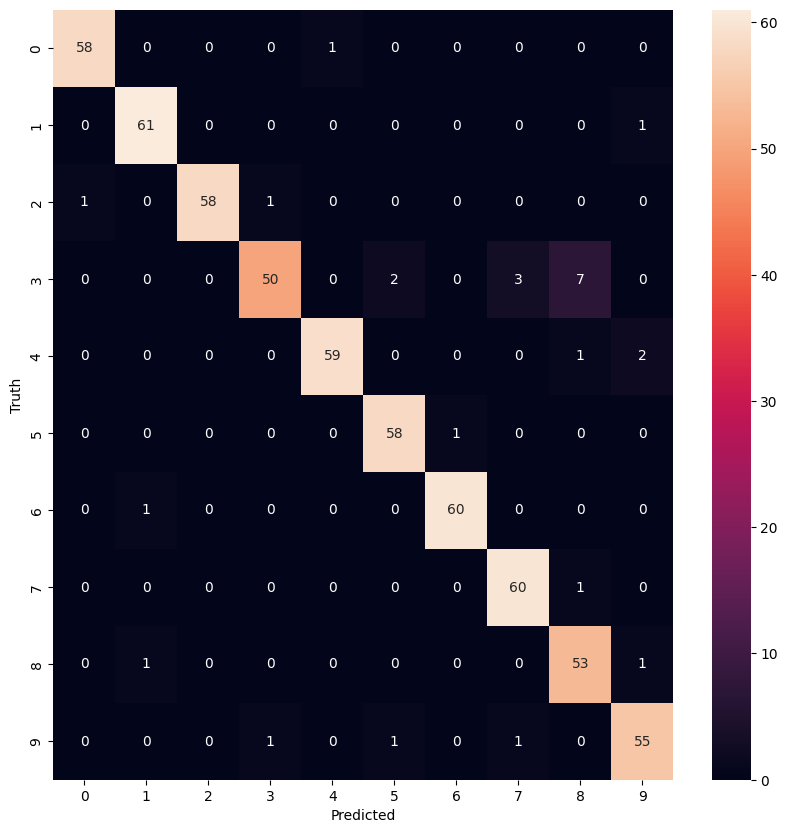

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")